# Regression on Yb based OLED dataset by LightAutoML

Designed by Koshelev Daniil

https://github.com/Lamblador/Yb_OLED_Dataset

This noteboot show how to read and use YbOLED dataset with LightAutoML package.

# Import and installation of modules

In [160]:
!pip install lightautoml
from IPython.display import clear_output
clear_output()

In [161]:
import pandas as pd
import numpy as np
import torch
import sklearn

In [162]:
!git clone https://github.com/Lamblador/Yb_OLED_Dataset/

fatal: destination path 'Yb_OLED_Dataset' already exists and is not an empty directory.


# Initializing of the LightAutoML

In [163]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Standard python libraries
import os
import requests

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco, ReportDecoUtilized
from lightautoml.addons.tabular_interpretation import SSWARM

Standart parameters

In [164]:
N_THREADS = 4 # number of the CPU to use
N_FOLDS = 5 # number folds in cross-validation
RANDOM_STATE = 42 # random state
TEST_SIZE = 0.20 # test dataset size
TIMEOUT = 300 # time for model to train
TARGET_NAME = 'Max. irradiance  uW/cm2' #name of the target parameter
# you can chose 'ECE  uW/W', 'Max. irradiance  uW/cm2', 'Uon ' or 'EQE  %'

In [165]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [166]:
task = Task('reg') # tast regression

### Read dataset

In [167]:
data = pd.read_csv('/content/Yb_OLED_Dataset/yb_oled_data_short2.csv', delimiter=';') # read file
data.drop('year', axis=1, inplace=True) #drop year data - no information for ML
data.dropna(subset = [TARGET_NAME], inplace=True) # drop all rows without target data

data

,HIL tikness nm,HIL HOMO,HIL LUMO,HTL tikness nm,HTL HOMO,HTL LUMO,HTL HOMO-EML HOMO,HTL LUMO-EML LUMO,EML tikness nm,EML HOMO,...,Max. irradiance uW/cm2,EQE %,ECE uW/W,Uon,t us,QY %,hole mobilty cm2/Vs,electron mobility cm2/Vs,total cm2/Vs,Pixel size mm2
3,20,-5.50,-2.40,0,NaN,NaN,NaN,NaN,50,NaN,...,0.14,0.00073,NaN,7.0,18.00,0.90,NaN,NaN,NaN,NaN
4,20,-5.50,-2.40,30,-5.50,-2.4,NaN,NaN,50,NaN,...,0.42,0.00640,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN
5,30,-5.50,-2.40,0,NaN,NaN,NaN,NaN,50,NaN,...,0.80,NaN,0.1,10.0,24.00,1.20,NaN,NaN,NaN,NaN
6,20,-5.50,-2.40,20,NaN,NaN,NaN,NaN,40,NaN,...,1.47,0.02700,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN
7,25,-5.20,-2.40,0,NaN,NaN,0.720,0.260,40,-5.920,...,2.00,NaN,NaN,8.0,1.20,0.38,NaN,NaN,1.240000e-10,NaN
8,25,-5.20,-2.40,0,NaN,NaN,0.720,0.260,40,-5.920,...,22.48,NaN,51.0,7.6,NaN,2.40,6.240000e-08,2.690000e-12,3.210000e-06,NaN
9,25,-5.20,-2.40,0,NaN,NaN,0.720,0.260,40,-5.920,...,12.13,NaN,44.0,7.7,NaN,1.41,NaN,NaN,2.690000e-05,NaN
10,25,-5.20,-2.40,0,NaN,NaN,0.720,0.260,40,-5.920,...,9.60,NaN,42.0,7.9,NaN,1.33,NaN,NaN,1.300000e-07,NaN
11,25,-5.50,-2.40,0,NaN,NaN,0.420,0.260,40,-5.920,...,19.29,NaN,47.0,7.7,NaN,1.92,NaN,NaN,4.500000e-08,NaN
12,30,-5.40,-2.40,10,-5.90,-2.4,NaN,NaN,60,NaN,...,1.40,0.14000,NaN,5.0,42.60,0.40,NaN,NaN,NaN,NaN


Train/test split

In [168]:
train_data, test_data = train_test_split(
    data,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

print(f'Data is splitted. Parts sizes: train_data = {train_data.shape}, test_data = {test_data.shape}')

train_data.head()

Data is splitted. Parts sizes: train_data = (35, 38), test_data = (9, 38)


,HIL tikness nm,HIL HOMO,HIL LUMO,HTL tikness nm,HTL HOMO,HTL LUMO,HTL HOMO-EML HOMO,HTL LUMO-EML LUMO,EML tikness nm,EML HOMO,...,Max. irradiance uW/cm2,EQE %,ECE uW/W,Uon,t us,QY %,hole mobilty cm2/Vs,electron mobility cm2/Vs,total cm2/Vs,Pixel size mm2
6,20,-5.5,-2.4,20,NaN,NaN,NaN,NaN,40,NaN,...,1.47,0.027,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN
9,25,-5.2,-2.4,0,NaN,NaN,0.720,0.260,40,-5.920,...,12.13,NaN,44.0,7.7,NaN,1.41,NaN,NaN,0.000027,NaN
31,50,-5.2,-2.3,15,-5.2,-2.3,-0.071,0.333,31,-5.129,...,2.50,0.025,79.0,3.8,12.0,1.40,NaN,NaN,NaN,12.0
35,50,-5.2,-2.3,20,-5.2,-2.3,0.639,0.757,30,-5.839,...,7.50,0.035,113.0,4.0,13.3,0.94,0.000093,0.000061,NaN,12.0
22,40,-5.2,-2.3,15,-5.2,-2.3,NaN,NaN,40,NaN,...,19.00,NaN,9.6,6.0,7.8,0.80,NaN,NaN,NaN,12.0


Roles of the columns. **target** - target value to predict, **drop** - ignoragle value.

In [169]:
#TARGET_NAME = 'Max. irradiance  uW/cm2' #Max. irradiance  uW/cm2 'ECE  uW/W', 'EQE  %', 'Uon'
roles = {
    'target': TARGET_NAME,
    'numeric': ['HIL tikness nm', 'HIL HOMO', 'HIL LUMO', 'HTL tikness  nm',
       'HTL  HOMO', 'HTL  LUMO', 'HTL HOMO-EML HOMO', 'HTL LUMO-EML LUMO',
       'EML tikness  nm', 'EML HOMO', 'EML LUMO', 'EML/Matrix', 'Matrix HOMO',
       'Matrix LUMO', 'EML HOMO-ETL HOMO', 'EML LUMO-ETL LUMO',
       'Matrix HOMO-ETL HOMO', 'Matrix LUMO-ETL LUMO', 'ETL tikness nm',
       'ETL  HOMO', 'ETL  LUMO', 'ETL tikness nm.1', 'ETL  HOMO.1',
       'ETL  LUMO.1', 'EIL tikness nm', 'EIL LUMO', 'Cathode nm',
       'Cathode LUMO', 'Uon',
       't  us', 'QY  %', 'hole mobilty  cm2/Vs', 'electron mobility  cm2/Vs',
       'total  cm2/Vs', 'Pixel size  mm2'],
    'drop': ['EQE  %', 'ECE  uW/W', 'Uon'] # HAVE TO CHANGE list if you change TARGET_NAME
}

In [170]:
automl = TabularAutoML( #tabular auto ml pipeline class
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

## Model training

In [171]:
%%time
out_of_fold_predictions = automl.fit_predict(train_data, roles = roles, verbose = 1)

[15:37:59] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[15:37:59] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[15:37:59] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[15:37:59] - time: 300.00 seconds


INFO:lightautoml.automl.presets.base:- time: 300.00 seconds


[15:37:59] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[15:37:59] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[15:37:59] Train data shape: (35, 38)



INFO:lightautoml.reader.base:Train data shape: (35, 38)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[15:38:20] Layer 1 train process start. Time left 279.30 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 279.30 secs


[15:38:20] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [57, 58, 59, 60, 61, 62, 63, 64, 65, 66], 'embed_sizes': array([10,  6,  5,  5,  5,  7,  6, 11,  7, 11], dtype=int32), 'data_size': 67}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -821.1703577616338
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -823.3337419235461
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -826.1601205859619
INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.t

[15:38:27] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -589.4651216644301


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -589.4651216644301


[15:38:27] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[15:38:27] Time left 271.65 secs



INFO:lightautoml.automl.base:Time left 271.65 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[1]	valid's l2: 902.45


[15:38:28] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[15:38:28] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[1]	valid's l2: 902.45
INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_

[15:38:28] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -609.5145049147386


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -609.5145049147386


[15:38:28] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[15:38:28] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 57.30 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 57.30 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-fccdf94e-b41c-4d19-93d0-268409ac9402
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[1]	valid's l2: 902.45
INFO:optuna.study.study:Trial 0 finished with value: -820.7405716493568 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: -820.7405716493568.
INFO3:lightautoml.ml_algo.tuning.optuna:Trial 1 with hyperpara

[15:38:49] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -820.7406 mse


[15:38:49] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.6872700594236812, 'bagging_fraction': 0.8659969709057025, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.24810409748678125}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 902.45
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[1]	valid's l2: 902.45
INFO2:lightautoml

[15:38:49] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -609.5145049147386


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -609.5145049147386


[15:38:49] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[15:38:49] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 23.0511596	test: 28.6580819	best: 28.6580819 (0)	total: 629us	remaining: 1.26s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 22.0882487	test: 28.8662133	best: 28.6580819 (0)	total: 7.13ms	remaining: 134ms
DEBUG:lightautoml.ml_algo.boost_cb:200:

[15:38:49] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 186.27 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 186.27 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-8e868c74-4d3c-4220-af54-ed74f912a50e
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 23.1268724	test: 28.6569578	best: 28.6569578 (0)	total: 1.34ms	remaining: 2.68s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 22.2034534	test: 28.8650056	best: 28.6569578 (0)	total: 13ms	remaining: 244ms
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22.1011982	test: 28.8675873	best: 28.6569578 (0)	total: 24.3ms	remaining: 218ms
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 22.0896713	test: 28.8676157	best: 28.6569578 (0)	total: 37ms	remaining: 209ms
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 28.65695779
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 0
INFO3:lightautoml.ml_algo.boost_cb:S

[15:39:04] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 3, 'l2_leaf_reg': 9.951524330827763, 'min_data_in_leaf': 12}
 achieve -821.1381 mse


[15:39:04] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 9.951524330827763, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 3, 'min_data_in_leaf': 12, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 23.1446548	test: 28.6527230	best: 28.6527230 (0)	total: 147us	remaining: 442ms
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 22.6840697	test: 28.8414013	best: 28.6527230 (0)	total: 4.45ms	remaining: 128ms
INFO3:lightau

[15:39:04] Time left 235.07 secs



INFO:lightautoml.automl.base:Time left 235.07 secs



[15:39:04] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[15:39:04] Blending: optimization starts with equal weights and score -601.1466334081559


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -601.1466334081559


[15:39:04] Blending: iteration 0: score = -589.4651216644301, weights = [1. 0. 0.]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -589.4651216644301, weights = [1. 0. 0.]


[15:39:04] Blending: iteration 1: score = -589.4651216644301, weights = [1. 0. 0.]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -589.4651216644301, weights = [1. 0. 0.]


[15:39:04] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[15:39:04] Automl preset training completed in 64.99 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 64.99 seconds



[15:39:04] Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) 



CPU times: user 34.6 s, sys: 1.3 s, total: 35.9 s
Wall time: 1min 5s


## Model prediction

In [172]:
%%time

test_predictions = automl.predict(test_data)
print(f'Prediction for test_data:\n{test_predictions}\nShape = {test_predictions.shape}')

Prediction for test_data:
array([[11.989314],
       [11.157792],
       [13.164511],
       [10.895494],
       [12.305023],
       [11.806242],
       [11.575471],
       [17.54444 ],
       [14.322581]], dtype=float32)
Shape = (9, 1)
CPU times: user 49.5 ms, sys: 0 ns, total: 49.5 ms
Wall time: 51.6 ms


In [173]:
y_true = test_data[TARGET_NAME]
y_pred = test_predictions.data
y_true

,Max. irradiance uW/cm2
41,2.00
28,8.25
29,6.50
40,7.00
38,4.00
44,4.50
7,2.00
15,11.00
11,19.29


In [174]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 1.00000 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) 


## Model prediction accuracy by MAPE

In [175]:
from sklearn.metrics import mean_absolute_percentage_error
scorer = mean_absolute_percentage_error(y_true, y_pred)
print(scorer)

1.8076652769455268


## Feature analysis

In [176]:
%%time

# Accurate feature importances calculation with detailed info (Permutation importances) -  can take long time to calculate
accurate_fi = automl.get_feature_scores('accurate', test_data, silent = True)

CPU times: user 1.18 s, sys: 12.1 ms, total: 1.2 s
Wall time: 1.21 s


<Axes: xlabel='Feature'>

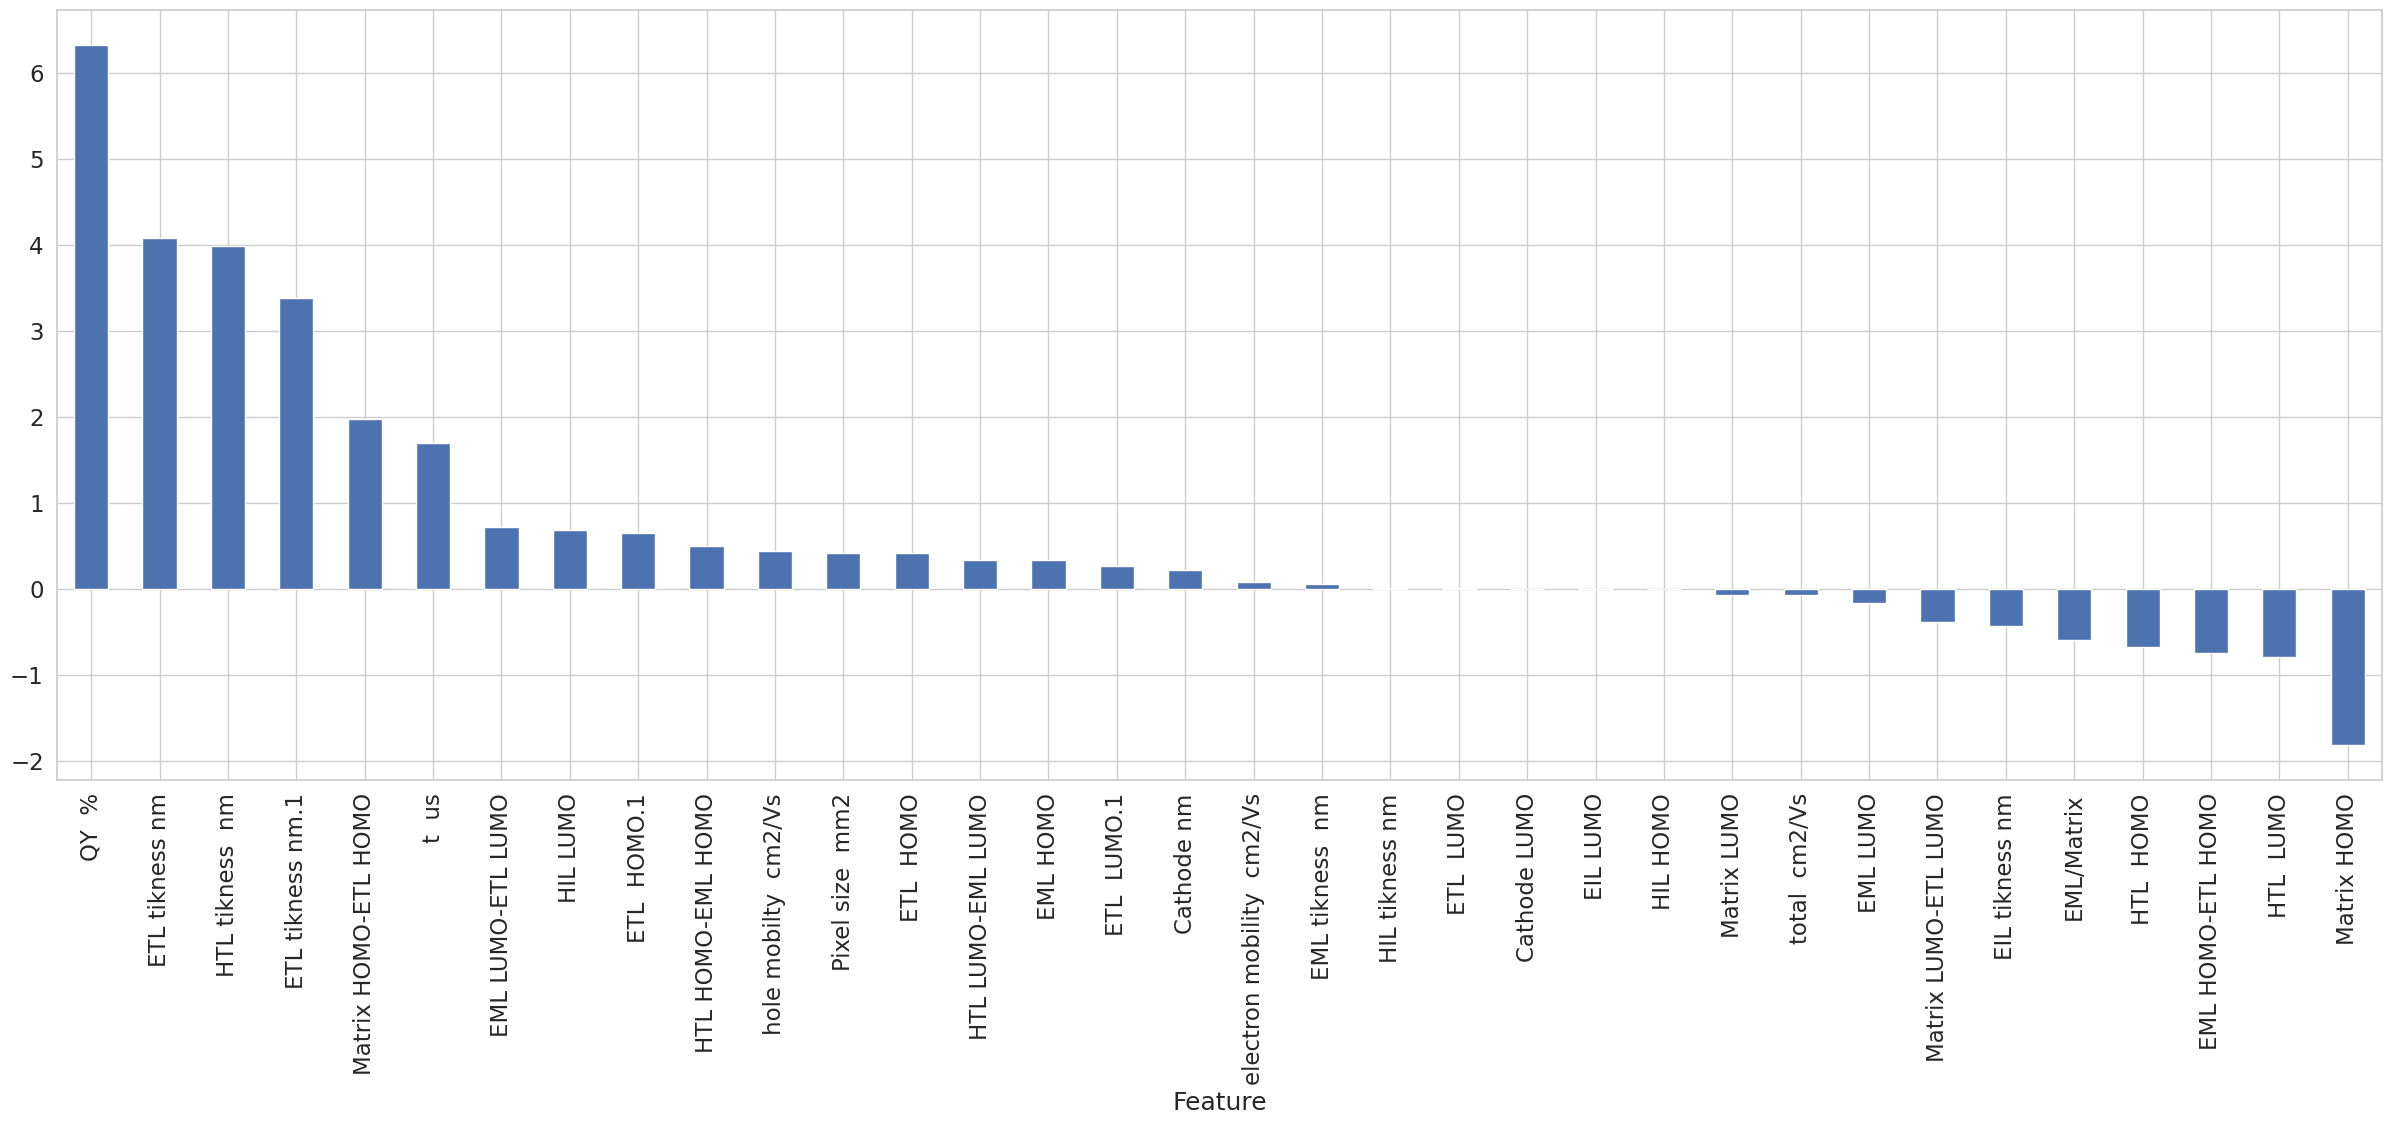

In [177]:
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

100%|██████████| 30/30 [00:00<00:00, 34.85it/s]


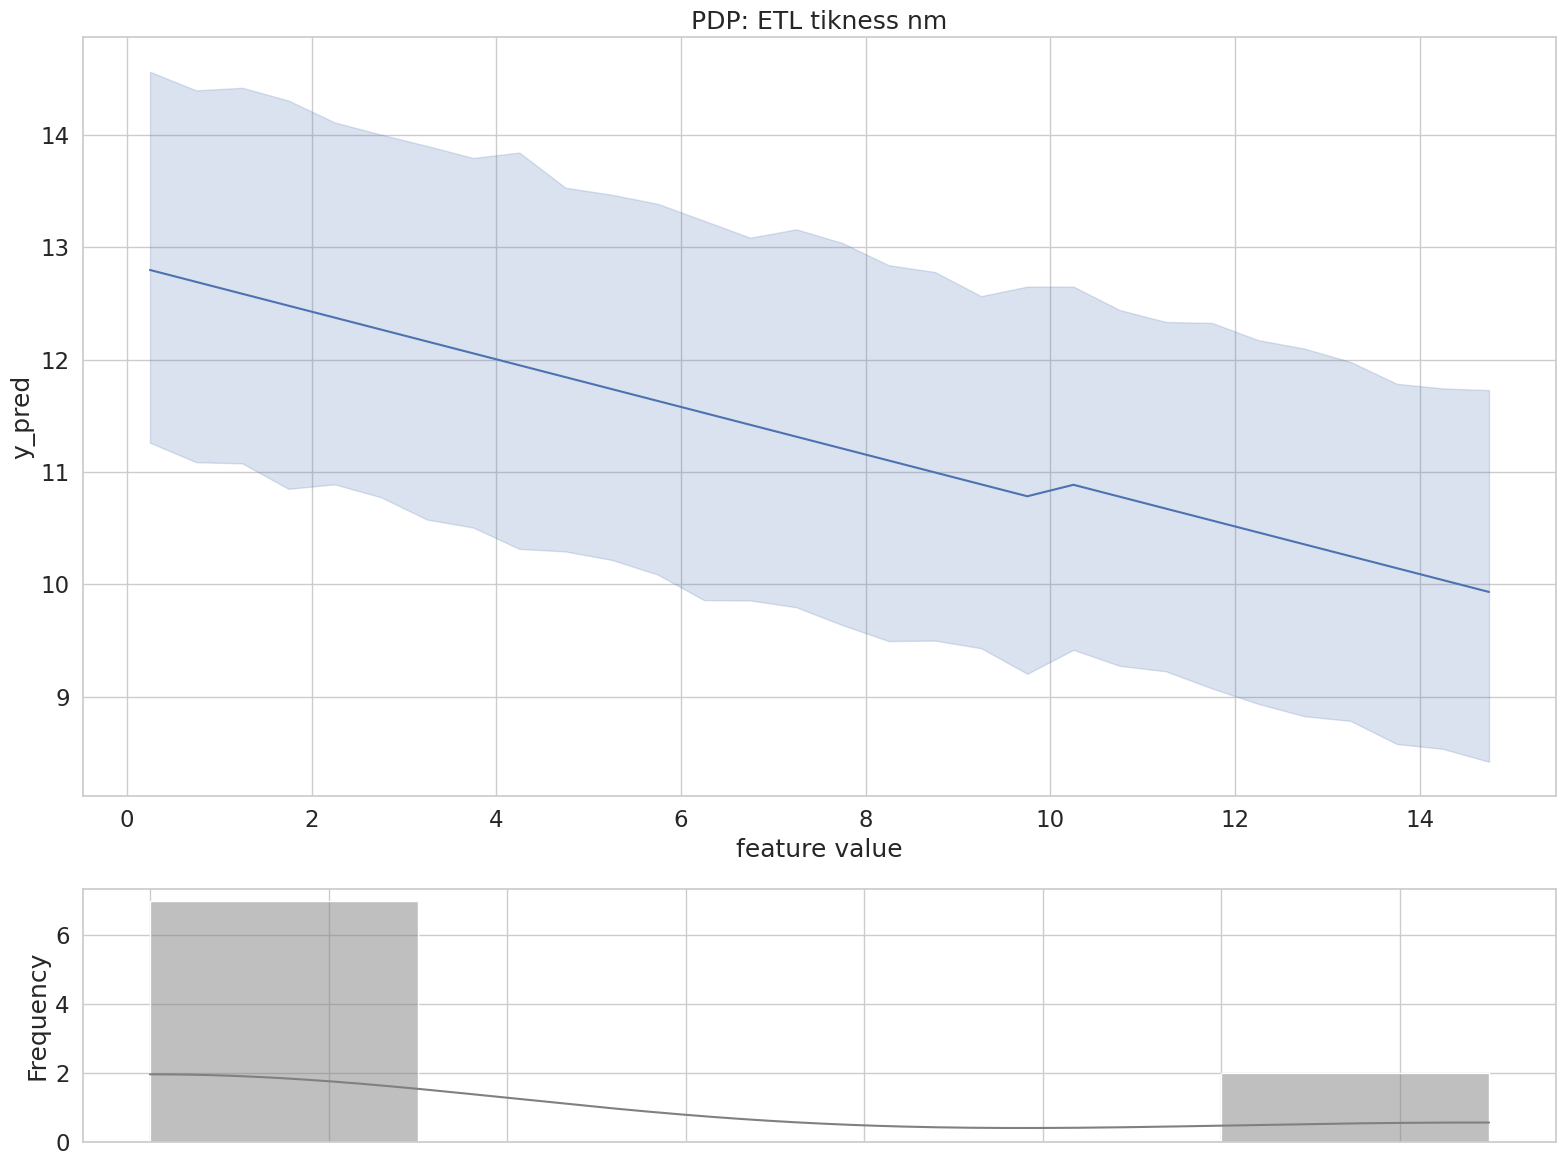

In [180]:
automl.plot_pdp(test_data, feature_name = 'ETL tikness nm')

# Model saving

In [179]:
import joblib
joblib.dump(automl, 'model.pkl') #model save
#automl=joblib.load(‘model.pkl’) #model load

['model.pkl']